# Gleb Koval's fruit model
## AcademyNEXT 2020

The base code is copied from `hw_day3_optimization.py`, but modified to output a more accurate model.

In [97]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt

In [98]:
def prepare_data(batch_size, input_shape):
    train_image_generator = ImageDataGenerator(rescale=1./255)
    validation_image_generator = ImageDataGenerator(rescale=1./255)

    train_dir = os.path.join(os.getcwd(), 'train')
    test_dir = os.path.join(os.getcwd(), 'test')

    train_data_gen = train_image_generator.flow_from_directory(
                    batch_size=batch_size,
                    directory=train_dir,
                    shuffle=True,
                    target_size=input_shape[:2],
                    class_mode='categorical')
    test_data_gen = validation_image_generator.flow_from_directory(
                    batch_size=batch_size,
                    directory=test_dir,
                    target_size=input_shape[:2],
                    class_mode='categorical')
    
    return (train_data_gen, test_data_gen)

In [99]:
def create_model(input_shape, output_size):
    return keras.Sequential([
        Conv2D(filters=16, kernel_size=4, padding="same", activation="tanh", input_shape=input_shape),
        MaxPooling2D(),
        Flatten(),
        Dropout(0.3),
        Dense(1024, activation="tanh"),
        Dropout(0.1),
        Dense(128, activation="tanh"),
        Dense(output_size, activation="softmax")
    ])

In [100]:
def compile_model(model):
    model.compile(
        optimizer="adam",
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )

In [101]:
def train_model(model, train_data, test_data, train_size, test_size, batch_size, epochs):
    return model.fit(
        x=train_data,
        steps_per_epoch=train_size // batch_size,
        epochs=epochs,
        validation_data=test_data,
        validation_steps=test_size // batch_size
    )

In [102]:
def show_results(history):
    # get array of accuracy values after each epoch for training and testing
    train_acc = history.history['accuracy']
    test_acc = history.history['val_accuracy']

    # get array of loss values after each epoch for training and testing
    train_loss=history.history['loss']
    test_loss=history.history['val_loss']

    print("Final Train Accuracy:", train_acc[-1])
    print("Final Test Accuracy:", test_acc[-1])

    # generate an array for they x axis values
    epochs_range = range(EPOCHS)

    # plot accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_acc, label='Train Accuracy')
    plt.plot(epochs_range, test_acc, label='Test Accuracy')
    plt.legend(loc='lower right')
    plt.title('Train and Test Accuracy')
    # plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, train_loss, label='Train Loss')
    plt.plot(epochs_range, test_loss, label='Test Loss')
    plt.legend(loc='upper right')
    plt.title('Train and Test Loss')
    plt.show()

In [103]:
INPUT_SHAPE = (100, 100, 3)
TRAIN_SIZE = 545
TEST_SIZE = 201
OUTPUT_SIZE = 18

In [104]:
BATCH_SIZE = 10
EPOCHS = 20

In [105]:
train_data, test_data = prepare_data(BATCH_SIZE, INPUT_SHAPE)

Found 545 images belonging to 18 classes.
Found 201 images belonging to 18 classes.


In [106]:
model = create_model(INPUT_SHAPE, OUTPUT_SIZE)
compile_model(model)

In [107]:
history = train_model(model, train_data, test_data, TRAIN_SIZE, TEST_SIZE, BATCH_SIZE, EPOCHS)

Epoch 1/20
54/54 [==============================] - 1s 20ms/step - loss: 3.4562 - accuracy: 0.0505 - val_loss: 2.9383 - val_accuracy: 0.0550
Epoch 2/20
54/54 [==============================] - 1s 17ms/step - loss: 2.9179 - accuracy: 0.0579 - val_loss: 2.9108 - val_accuracy: 0.0600
Epoch 3/20
54/54 [==============================] - 1s 17ms/step - loss: 2.7754 - accuracy: 0.1290 - val_loss: 2.2036 - val_accuracy: 0.3750
Epoch 4/20
54/54 [==============================] - 1s 17ms/step - loss: 1.5115 - accuracy: 0.6280 - val_loss: 1.0326 - val_accuracy: 0.7850
Epoch 5/20
54/54 [==============================] - 1s 17ms/step - loss: 0.6585 - accuracy: 0.9252 - val_loss: 0.4602 - val_accuracy: 0.9700
Epoch 6/20
54/54 [==============================] - 1s 17ms/step - loss: 0.2700 - accuracy: 0.9944 - val_loss: 0.2531 - val_accuracy: 0.9750
Epoch 7/20
54/54 [==============================] - 1s 17ms/step - loss: 0.1720 - accuracy: 0.9888 - val_loss: 0.2944 - val_accuracy: 0.9300
Epoch 8/20
54

Final Train Accuracy: 1.0
Final Test Accuracy: 0.9800000190734863


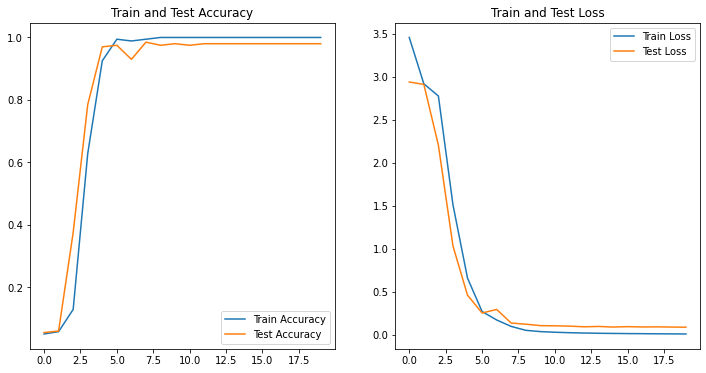

In [108]:
show_results(history)